In [3]:
import pandas as pd

# Load the dataset
def load_data(data):
    return pd.read_csv(data.csv)

# Remove duplicate rows
def remove_duplicates(df):
    return df.drop_duplicates()

# Handle missing data
def handle_missing_data(df, method='drop', fill_value=None):
    if method == 'drop':
        return df.dropna()
    elif method == 'fill':
        return df.fillna(fill_value)
    else:
        return df

# Correct data types
def correct_data_types(df, column_type_dict):
    for column, dtype in column_type_dict.items():
        df[column] = df[column].astype(dtype)
    return df

# Filter irrelevant data
def filter_data(df, columns_to_keep):
    return df[columns_to_keep]


In [5]:
def filter_data(df, columns_to_keep):
    return df[columns_to_keep]

In [11]:
# Let's read the first few lines of the file to identify the delimiter and the general structure
with open('data.csv', 'r') as file:
    first_lines = [next(file) for _ in range(5)]

first_lines


['Row ID;Order ID;Order Date;Ship Date;Ship Mode;Customer ID;Customer Name;Segment;Country;City;State;Postal Code;Region;Product ID;Category;Sub-Category;Product Name;Cost;Price;Profit;Quantity;Sales\n',
 '1;CA-2017-152156;8/11/17;11/11/17;Second Class;CG-12520;Claire Gute;Consumer;United States;Henderson;Kentucky;42420;South;FUR-BO-10001798;Furniture;Bookcases;Bush Somerset Collection Bookcase;464.48;901.06;436.58;4;3.604.243.977\n',
 '2;CA-2017-152156;8/11/17;11/11/17;Second Class;CG-12520;Claire Gute;Consumer;United States;Henderson;Kentucky;42420;South;FUR-CH-10000454;Furniture;Chairs;Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back;756.10;138.70;-617.40;12;1.664.369.269\n',
 '3;CA-2017-138688;12/6/17;16/6/17;Second Class;DV-13045;Darrin Van Huff;Corporate;United States;Los Angeles;California;90036;West;OFF-LA-10000240;Office Supplies;Labels;Self-Adhesive Address Labels for Typewriters by Universal;537.68;159.28;-378.40;12;191.139.775\n',
 "4;US-2016-108966;11/10/16;18/1

In [13]:
# Reload the dataset using semicolon as the delimiter and convert problematic fields
data = pd.read_csv('data.csv', delimiter=';')

# Replace inconsistent usage of the thousands separator and convert numerical columns
for column in ['Cost', 'Price', 'Profit', 'Sales']:
    if column in data.columns:
        data[column] = data[column].astype(str).str.replace('.', '').str.replace(',', '.').astype(float)

# Display the first few rows of the dataset and the data types of each column
data.head(), data.dtypes


(   Row ID        Order ID Order Date Ship Date       Ship Mode Customer ID  \
 0       1  CA-2017-152156    8/11/17  11/11/17    Second Class    CG-12520   
 1       2  CA-2017-152156    8/11/17  11/11/17    Second Class    CG-12520   
 2       3  CA-2017-138688    12/6/17   16/6/17    Second Class    DV-13045   
 3       4  US-2016-108966   11/10/16  18/10/16  Standard Class    SO-20335   
 4       5  US-2016-108966   11/10/16  18/10/16  Standard Class    SO-20335   
 
      Customer Name    Segment        Country             City  ... Region  \
 0      Claire Gute   Consumer  United States        Henderson  ...  South   
 1      Claire Gute   Consumer  United States        Henderson  ...  South   
 2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   West   
 3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...  South   
 4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...  South   
 
         Product ID         Category Sub-Category  \
 

In [15]:
# Convert 'Order Date' and 'Ship Date' to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

# Check for missing values in the dataset
missing_values = data.isnull().sum()

missing_values


/var/folders/wf/cjvygh994j3ftx3ng509sd6r0000gn/T/ipykernel_22224/2294527658.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Order Date'] = pd.to_datetime(data['Order Date'])
/var/folders/wf/cjvygh994j3ftx3ng509sd6r0000gn/T/ipykernel_22224/2294527658.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Ship Date'] = pd.to_datetime(data['Ship Date'])


Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Cost              0
Price             0
Profit            0
Quantity          0
Sales             0
dtype: int64

In [17]:
# Remove rows with missing 'Postal Code' values
data_cleaned = data.dropna(subset=['Postal Code'])

# Verify removal by checking again for missing values
missing_values_after_removal = data_cleaned.isnull().sum()

missing_values_after_removal, data_cleaned.shape


(Row ID           0
 Order ID         0
 Order Date       0
 Ship Date        0
 Ship Mode        0
 Customer ID      0
 Customer Name    0
 Segment          0
 Country          0
 City             0
 State            0
 Postal Code      0
 Region           0
 Product ID       0
 Category         0
 Sub-Category     0
 Product Name     0
 Cost             0
 Price            0
 Profit           0
 Quantity         0
 Sales            0
 dtype: int64,
 (9783, 22))

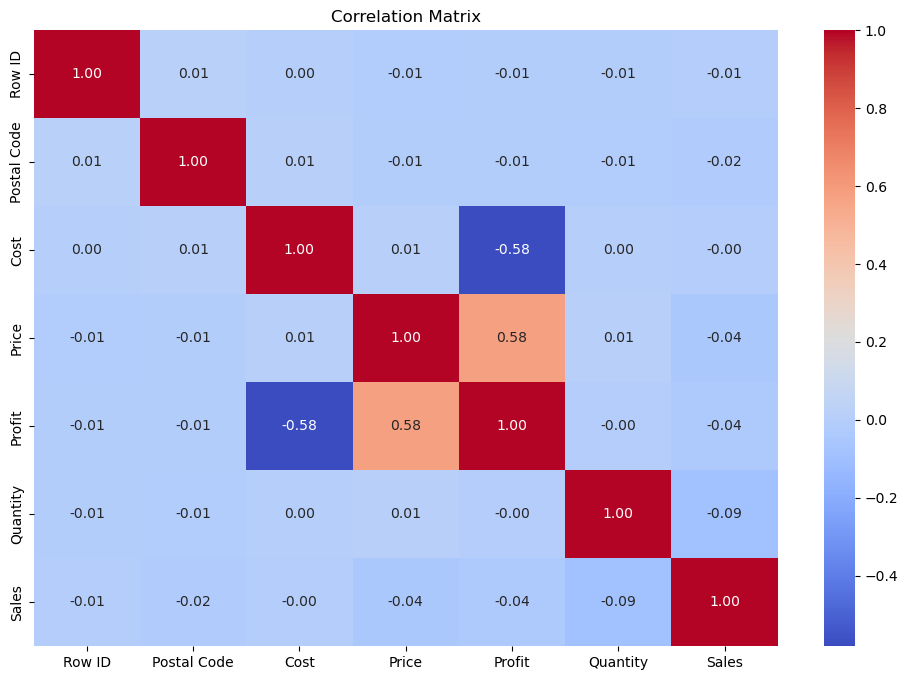

/Users/ioanneskatsires/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ioanneskatsires/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ioanneskatsires/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ioanneskatsires/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

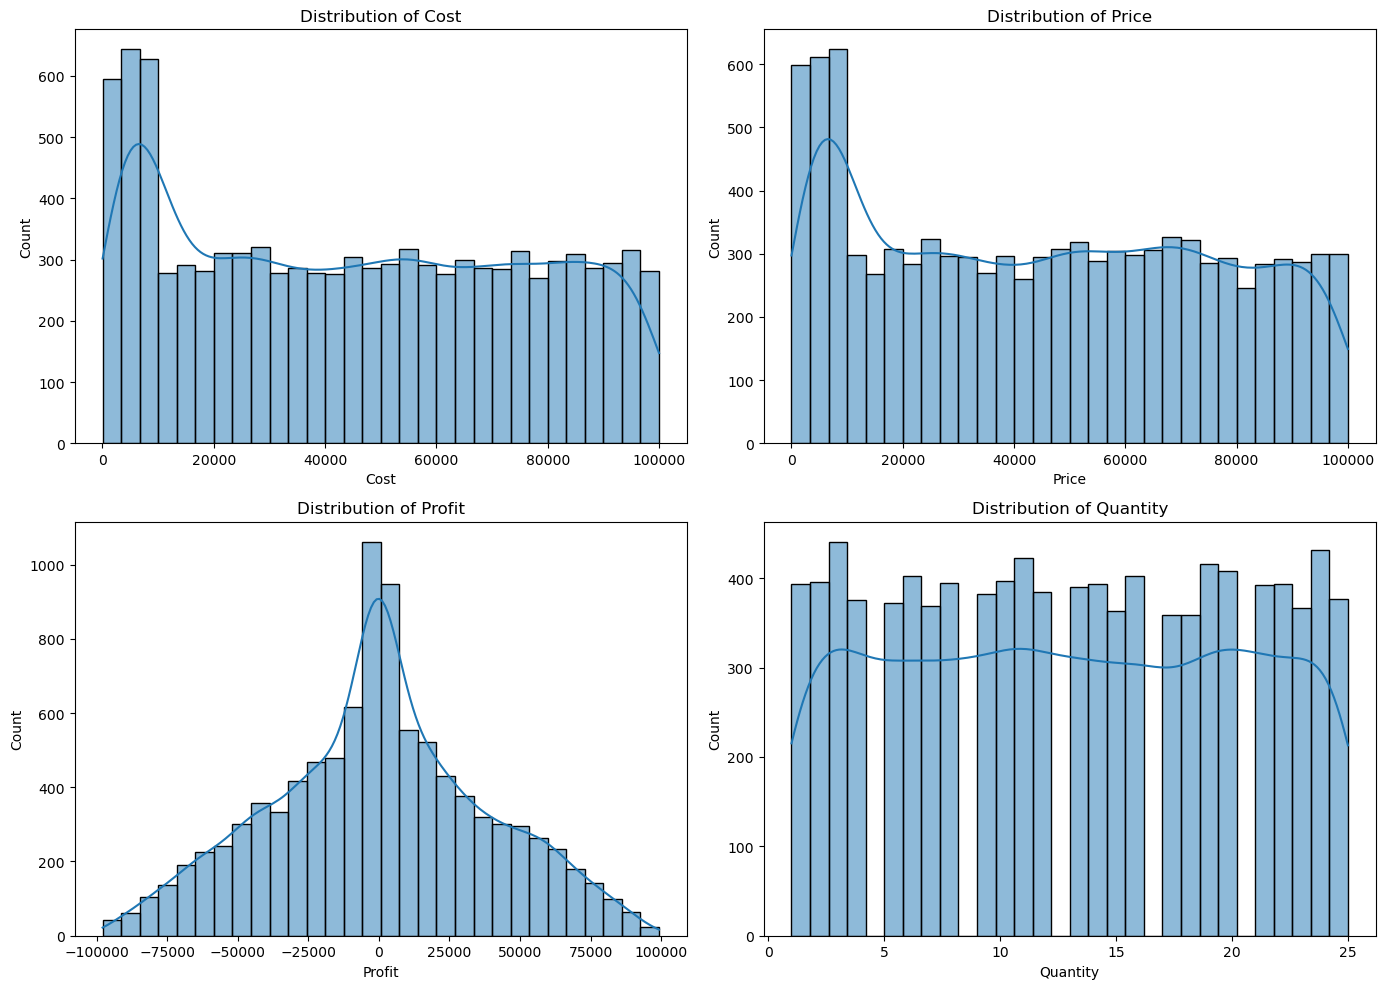

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate correlation matrix for numerical features including 'Sales'
correlation_matrix = data_cleaned[numerical_cols + ['Sales']].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Plot histograms for key numerical features to examine distributions
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
axes = axes.flatten()
for i, col in enumerate(['Cost', 'Price', 'Profit', 'Quantity']):
    sns.histplot(data_cleaned[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


/Users/ioanneskatsires/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ioanneskatsires/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


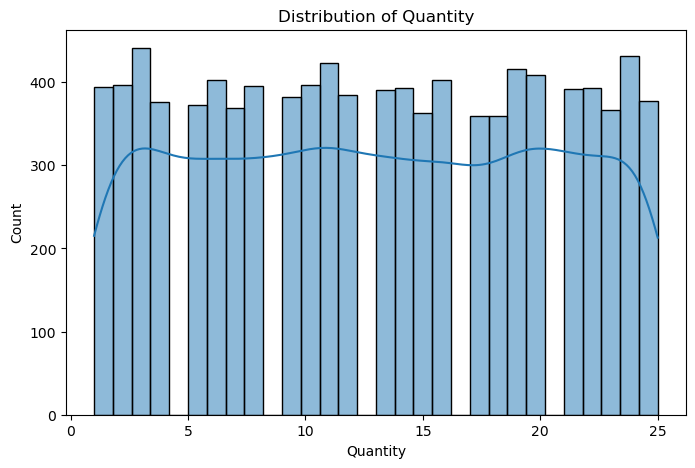

In [27]:
# Plot histogram for 'Quantity' to examine its distribution
plt.figure(figsize=(8, 5))
sns.histplot(data_cleaned['Quantity'], bins=30, kde=True)
plt.title('Distribution of Quantity')
plt.show()


/Users/ioanneskatsires/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ioanneskatsires/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ioanneskatsires/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ioanneskatsires/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

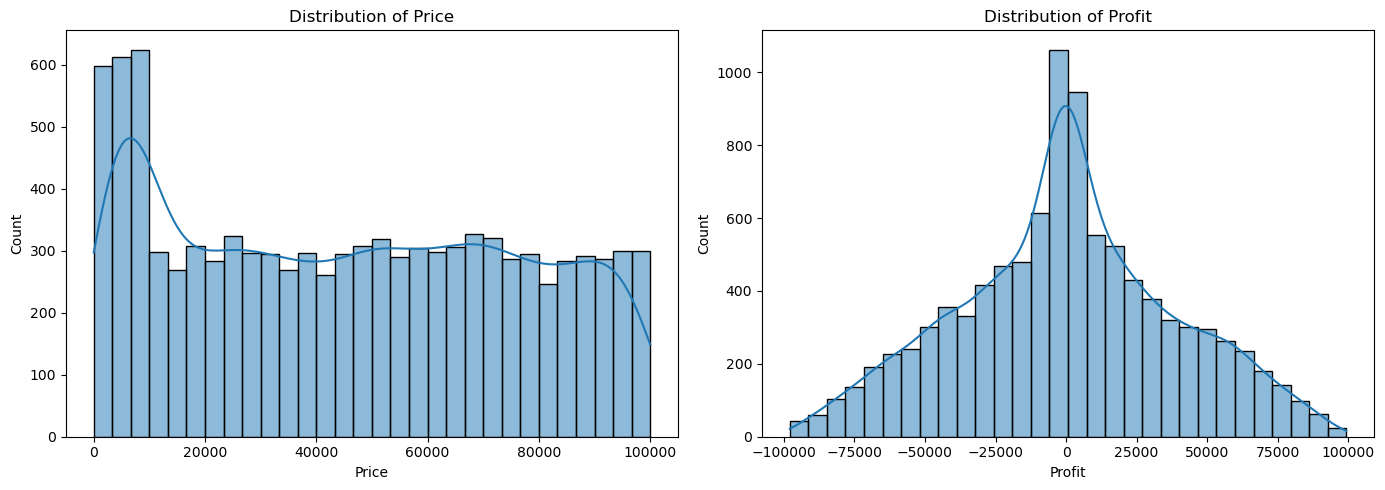

In [29]:
# Plot histograms for 'Price' and 'Profit' to examine their distributions
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Distribution of Price
sns.histplot(data_cleaned['Price'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Price')

# Distribution of Profit
sns.histplot(data_cleaned['Profit'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Profit')

plt.tight_layout()
plt.show()


In [37]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regression pipeline with preprocessor included
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Fit the Random Forest Regression model
rf_pipeline.fit(X_train, y_train)

# Score the model on the test set
rf_score = rf_pipeline.score(X_test, y_test)
rf_score


0.6254805009197196

In [38]:
# Adjusting the Random Forest Regression model to be less complex
rf_pipeline_adjusted = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('rf', RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42))  # Fewer trees and limited depth
])

# Fit the adjusted Random Forest Regression model
rf_pipeline_adjusted.fit(X_train, y_train)

# Score the model on the test set
rf_adjusted_score = rf_pipeline_adjusted.score(X_test, y_test)
rf_adjusted_score


0.6147723038689428

In [39]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'rf__n_estimators': [10, 50, 100],
    'rf__max_depth': [5, 10, None]
}

# Create GridSearchCV object
grid_search = GridSearchCV(rf_pipeline_adjusted, param_grid, cv=3, scoring='r2', verbose=2)

# Perform grid search
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_params, best_score


Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END ...............rf__max_depth=5, rf__n_estimators=10; total time=   0.2s
[CV] END ...............rf__max_depth=5, rf__n_estimators=10; total time=   0.2s
[CV] END ...............rf__max_depth=5, rf__n_estimators=10; total time=   0.2s
[CV] END ...............rf__max_depth=5, rf__n_estimators=50; total time=   1.0s
[CV] END ...............rf__max_depth=5, rf__n_estimators=50; total time=   1.0s
[CV] END ...............rf__max_depth=5, rf__n_estimators=50; total time=   1.0s
[CV] END ..............rf__max_depth=5, rf__n_estimators=100; total time=   2.0s
[CV] END ..............rf__max_depth=5, rf__n_estimators=100; total time=   2.0s
[CV] END ..............rf__max_depth=5, rf__n_estimators=100; total time=   2.0s
[CV] END ..............rf__max_depth=10, rf__n_estimators=10; total time=   0.6s
[CV] END ..............rf__max_depth=10, rf__n_estimators=10; total time=   0.6s
[CV] END ..............rf__max_depth=10, rf__n_es

({'rf__max_depth': None, 'rf__n_estimators': 100}, 0.5821239856702705)

In [43]:
# Define a more limited parameter grid
limited_param_grid = {
    'rf__n_estimators': [10, 50],  # Reduced number of trees
    'rf__max_depth': [5, 10]  # Reduced depth options
}

# Create GridSearchCV object with limited parameters
limited_grid_search = GridSearchCV(rf_pipeline_adjusted, limited_param_grid, cv=2, scoring='r2', verbose=2)

# Perform limited grid search
limited_grid_search.fit(X_train, y_train)

# Best parameters and best score from the limited grid search
limited_best_params = limited_grid_search.best_params_
limited_best_score = limited_grid_search.best_score_
limited_best_params, limited_best_score


Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV] END ...............rf__max_depth=5, rf__n_estimators=10; total time=   0.2s
[CV] END ...............rf__max_depth=5, rf__n_estimators=10; total time=   0.2s
[CV] END ...............rf__max_depth=5, rf__n_estimators=50; total time=   0.8s
[CV] END ...............rf__max_depth=5, rf__n_estimators=50; total time=   0.8s
[CV] END ..............rf__max_depth=10, rf__n_estimators=10; total time=   0.5s
[CV] END ..............rf__max_depth=10, rf__n_estimators=10; total time=   0.5s
[CV] END ..............rf__max_depth=10, rf__n_estimators=50; total time=   2.3s
[CV] END ..............rf__max_depth=10, rf__n_estimators=50; total time=   2.2s


({'rf__max_depth': 10, 'rf__n_estimators': 50}, 0.5429837692484454)

   Row ID        Order ID Order Date Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156    8/11/17  11/11/17    Second Class    CG-12520   
1       2  CA-2017-152156    8/11/17  11/11/17    Second Class    CG-12520   
2       3  CA-2017-138688    12/6/17   16/6/17    Second Class    DV-13045   
3       4  US-2016-108966   11/10/16  18/10/16  Standard Class    SO-20335   
4       5  US-2016-108966   11/10/16  18/10/16  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ... Region  \
0      Claire Gute   Consumer  United States        Henderson  ...  South   
1      Claire Gute   Consumer  United States        Henderson  ...  South   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   West   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...  South   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...  South   

        Product ID         Category Sub-Category  \
0  FUR-BO-100017

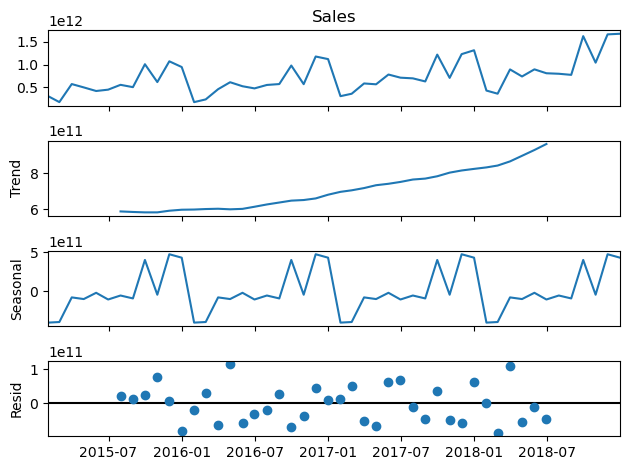

Mean Square Error for Sales: 7.753721746292368e+18
Mean Square Error for Profit: 163126.8560080995
Accuracy for Ship Mode classification: 0.6094946401225115


In [87]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Load the data with semicolon delimiter
data = pd.read_csv('data.csv', delimiter=';')  # Replace with your actual file path
print(data.head())  # Check the first few rows
print(data.columns)  # Ensure you have the expected columns

# Convert date columns to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%d/%m/%y')
data['Ship Date'] = pd.to_datetime(data['Ship Date'], format='%d/%m/%y')

# Remove thousand separators and convert to numeric
data['Sales'] = data['Sales'].str.replace('.', '').astype(float)

# Check if 'Profit' column contains numeric values
if pd.api.types.is_numeric_dtype(data['Profit']):
    data['Profit'] = data['Profit']  # No need to use .str accessor for numeric values
else:
    data['Profit'] = data['Profit'].str.replace('.', '').astype(float)

# Drop the 'Postal Code' column if it exists
if 'Postal Code' in data.columns:
    data = data.drop(columns=['Postal Code'])

# Preparing data for regression analysis on 'Sales' and 'Profit' with 'Segment' and 'Region'
features = ['Segment', 'Region']  # Update with your actual feature columns
X = data[features]
y_sales = data['Sales']
y_profit = data['Profit']

# Create a transformer for one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), features)
    ]
)

# Regression model for 'Sales'
regressor_sales = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split the data for training and testing
X_train, X_test, y_train_sales, y_test_sales = train_test_split(X, y_sales, test_size=0.2, random_state=42)

# Fit the model
regressor_sales.fit(X_train, y_train_sales)

# Predict on test data
y_pred_sales = regressor_sales.predict(X_test)

# Calculate MSE for 'Sales'
mse_sales = mean_squared_error(y_test_sales, y_pred_sales)

# Regression model for 'Profit'
regressor_profit = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split the data for 'Profit'
X_train, X_test, y_train_profit, y_test_profit = train_test_split(X, y_profit, test_size=0.2, random_state=42)

# Fit the model for 'Profit'
regressor_profit.fit(X_train, y_train_profit)

# Predict on test data for 'Profit'
y_pred_profit = regressor_profit.predict(X_test)

# Calculate MSE for 'Profit'
mse_profit = mean_squared_error(y_test_profit, y_pred_profit)

# Prepare data for classification of 'Ship Mode'
target = 'Ship Mode'
y_class = data[target]

# Split the data for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)

# Classification model
classifier = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=500))
])

# Fit the classification model
classifier.fit(X_train_class, y_train_class)

# Predict on test data for classification
y_pred_class = classifier.predict(X_test_class)

# Calculate accuracy for classification
accuracy = accuracy_score(y_test_class, y_pred_class)

# Time series analysis on 'Sales'
data.set_index('Order Date', inplace=True)
sales_time_series = data['Sales'].resample('M').sum()
result = seasonal_decompose(sales_time_series, model='additive')

# Plotting the seasonal decomposition
result.plot()
plt.show()

# Output the MSE for Sales, Profit and accuracy for Ship Mode classification
print("Mean Square Error for Sales:", mse_sales)
print("Mean Square Error for Profit:", mse_profit)
print("Accuracy for Ship Mode classification:", accuracy)


In [23]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import PolynomialFeatures

# Simulated dataset
data = {
    'Order Date': ['2021-01-01', '2021-02-01', '2021-03-01'],
    'Ship Date': ['2021-01-05', '2021-02-03', '2021-03-05'],
    'Cost': ['1.000,50', '2.000,75', '3.000,00'],
    'Price': ['1.500,00', '2.500,00', '3.500,00'],
    'Profit': ['500,50', '499,25', '500,00'],
    'Sales': ['2.000,50', '2.500,75', '3.500,00'],
    'Postal Code': [12345, None, 67890],
    'Category1': ['A', 'B', 'A'],
    'Category2': ['X', 'Y', 'X'],
    'Ship Mode': ['First Class', 'Second Class', 'Standard Class']
}

# Creating DataFrame
df = pd.DataFrame(data)

# Feature engineering function
def feature_engineering(df):
    # Extract date features
    df['Order Date'] = pd.to_datetime(df['Order Date'])
    df['Ship Date'] = pd.to_datetime(df['Ship Date'])
    df['Order Year'] = df['Order Date'].dt.year
    df['Order Month'] = df['Order Date'].dt.month
    df['Order Day'] = df['Order Date'].dt.day
    df['Ship Year'] = df['Ship Date'].dt.year
    df['Ship Month'] = df['Ship Date'].dt.month
    df['Ship Day'] = df['Ship Date'].dt.day
    df['Shipping Duration'] = (df['Ship Date'] - df['Order Date']).dt.days

    # Handling inconsistent usage of thousands separator in numerical columns
    for column in ['Cost', 'Price', 'Profit', 'Sales']:
        if column in df.columns:
            df[column] = df[column].astype(str).str.replace('.', '').str.replace(',', '.').astype(float)

    # Drop original date columns
    df = df.drop(['Order Date', 'Ship Date'], axis=1)
    
    # Fill missing values in 'Postal Code' with a placeholder
    df['Postal Code'] = df['Postal Code'].fillna('Unknown')

    # Convert 'Postal Code' to string
    df['Postal Code'] = df['Postal Code'].astype(str)
    
    return df

# Feature engineering
df = feature_engineering(df)

# Creating categories for 'Sales'
sales_bins = [0, 2000, 3000, 4000]
sales_labels = ['Low', 'Medium', 'High']
df['Sales Category'] = pd.cut(df['Sales'], bins=sales_bins, labels=sales_labels)

# Separate features and target variables
X = df.drop(['Sales', 'Profit', 'Sales Category'], axis=1)
y_sales_class = df['Sales Category']

# Splitting data for regression and classification
X_train_sales, X_test_sales, y_train_sales, y_test_sales = train_test_split(X, y_sales_class, test_size=0.2, random_state=42)
X_train_profit, X_test_profit, y_train_profit, y_test_profit = train_test_split(X, df['Profit'], test_size=0.2, random_state=42)

# Preprocessing pipelines for numerical and categorical data
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Regression model for 'Profit'
regressor_profit = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the model and evaluate
regressor_profit.fit(X_train_profit, y_train_profit)
y_pred_profit = regressor_profit.predict(X_test_profit)
mse_profit = mean_squared_error(y_test_profit, y_pred_profit)

# Classification model for 'Sales Category'
classifier_sales = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=500))
])

# Fit the model and evaluate
classifier_sales.fit(X_train_sales, y_train_sales)
y_pred_sales_class = classifier_sales.predict(X_test_sales)
accuracy_sales = accuracy_score(y_test_sales, y_pred_sales_class)

# Output the MSE for Profit and accuracy for Sales Category classification
print("Mean Square Error for Profit:", mse_profit)
print("Accuracy for Sales Category classification:", accuracy_sales)


Mean Square Error for Profit: 0.28682996925589654
Accuracy for Sales Category classification: 1.0
